In [142]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV, train_test_split
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.discriminant_analysis import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.feature_selection import VarianceThreshold
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import f1_score



In [143]:
data_random_forest_final = pd.read_csv('/home/cid34senhas/Desktop/DAATP/Entrega/2_data_Random_Forest_Clean.csv')

In [144]:
def plot_confusion_matrix_with_labels(confusion_matrix, label_mapping):
    # Criar um mapeamento inverso
    reverse_label_mapping = {v: k for k, v in label_mapping.items()}
    
    # Aplicar o mapeamento inverso na matriz de confusão
    cm_with_labels = np.zeros_like(confusion_matrix, dtype=object)
    for i in range(confusion_matrix.shape[0]):
        for j in range(confusion_matrix.shape[1]):
            cm_with_labels[i, j] = f"{reverse_label_mapping[i]} (Pred: {reverse_label_mapping[j]})"

    # Criar um DataFrame para facilitar a visualização
    df_cm = pd.DataFrame(confusion_matrix, index=reverse_label_mapping.values(), columns=reverse_label_mapping.values())
    
    # Plotar a matriz de confusão
    plt.figure(figsize=(10, 7))
    sns.heatmap(df_cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix with Labels')
    plt.show()
label_mapping = {
    'CN-CN': 0,
    'AD-AD': 1,
    'MCI-AD': 2,
    'MCI-MCI': 3,
    'CN-MCI' : 4
}

## Modelo

In [145]:
X = data_random_forest_final.drop(['Transition'], axis= 1)
y = data_random_forest_final['Transition']



In [146]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=34, stratify=y)


              precision    recall  f1-score   support

           0       0.55      0.88      0.68        24
           1       0.71      0.67      0.69        15
           2       0.40      0.35      0.38        17
           3       0.50      0.28      0.36        18
           4       0.00      0.00      0.00         3

    accuracy                           0.55        77
   macro avg       0.43      0.43      0.42        77
weighted avg       0.52      0.55      0.51        77



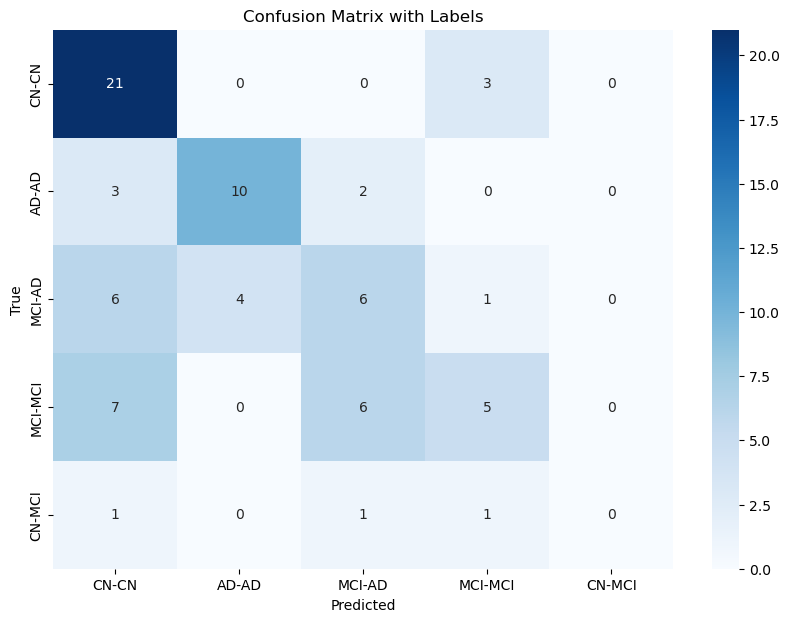

In [147]:
rf_model_score = RandomForestClassifier(n_estimators=100, max_features='sqrt', random_state=34)


rf_model_score.fit(X_train, y_train)
rf_pred = rf_model_score.predict(X_test)
print(classification_report(y_test, rf_pred,zero_division=0))
cm = confusion_matrix(y_test, rf_pred)
plot_confusion_matrix_with_labels(cm,label_mapping)

In [148]:
rf_score = cross_val_score(rf_model_score, X, y, cv=5,scoring='f1_macro')

print(f"Cross Validation Score: {rf_score}")
print(f"Cross Validation Score Média: {rf_score.mean()}")
print(f"Cross Validation Score STD: {rf_score.std()}")

Cross Validation Score: [0.39368608 0.29021174 0.32406015 0.44953098 0.35297907]
Cross Validation Score Média: 0.3620936043359335
Cross Validation Score STD: 0.055389531418651265


## Aplicar Normalização

In [149]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_norm = data_random_forest_final.drop(['Transition'], axis= 1)
y_norm = data_random_forest_final['Transition']
X_norm = scaler.fit_transform(X_train_norm)

              precision    recall  f1-score   support

           0       0.54      0.88      0.67        24
           1       0.71      0.67      0.69        15
           2       0.43      0.35      0.39        17
           3       0.50      0.28      0.36        18
           4       0.00      0.00      0.00         3

    accuracy                           0.55        77
   macro avg       0.44      0.43      0.42        77
weighted avg       0.52      0.55      0.51        77



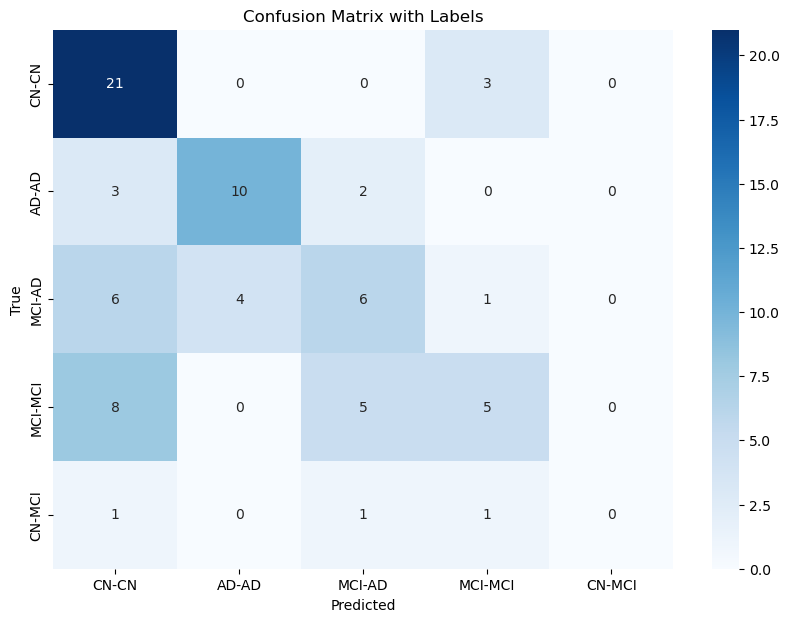

In [150]:


X_train, X_test, y_train, y_test = train_test_split(X_norm, y_norm, test_size=0.25, random_state=34, stratify=y)

rf_model_normalizado = RandomForestClassifier(n_estimators=100, max_features='sqrt', random_state=34)


rf_model_normalizado.fit(X_train, y_train)
rf_pred = rf_model_normalizado.predict(X_test)
print(classification_report(y_test, rf_pred,zero_division=0))
cm = confusion_matrix(y_test, rf_pred)
plot_confusion_matrix_with_labels(cm,label_mapping)


In [151]:
rf_score_norm = cross_val_score(rf_model_normalizado, X_norm, y_norm, cv=5,scoring='f1_macro')

print(f"Cross Validation Score: {rf_score_norm}")
print(f"Cross Validation Score Média: {rf_score_norm.mean()}")
print(f"Cross Validation Score STD: {rf_score_norm.std()}")

Cross Validation Score: [0.39263418 0.28854701 0.34443194 0.45154882 0.34629991]
Cross Validation Score Média: 0.3646923708470157
Cross Validation Score STD: 0.05453745794288874


Como esperado, a normalização dos dados no random_forest não teve qualquer interferencia já que este modelo é resistente a dados não Normalizados

## Smote

Y Train Values:
Transition
0    72
3    53
2    51
1    45
4     7
Name: count, dtype: int64
Y Train Values:
Transition
2    72
1    72
3    72
0    72
4    72
Name: count, dtype: int64
              precision    recall  f1-score   support

           0       0.60      0.75      0.67        24
           1       0.44      0.53      0.48        15
           2       0.22      0.24      0.23        17
           3       0.36      0.22      0.28        18
           4       0.00      0.00      0.00         3

    accuracy                           0.44        77
   macro avg       0.33      0.35      0.33        77
weighted avg       0.41      0.44      0.42        77



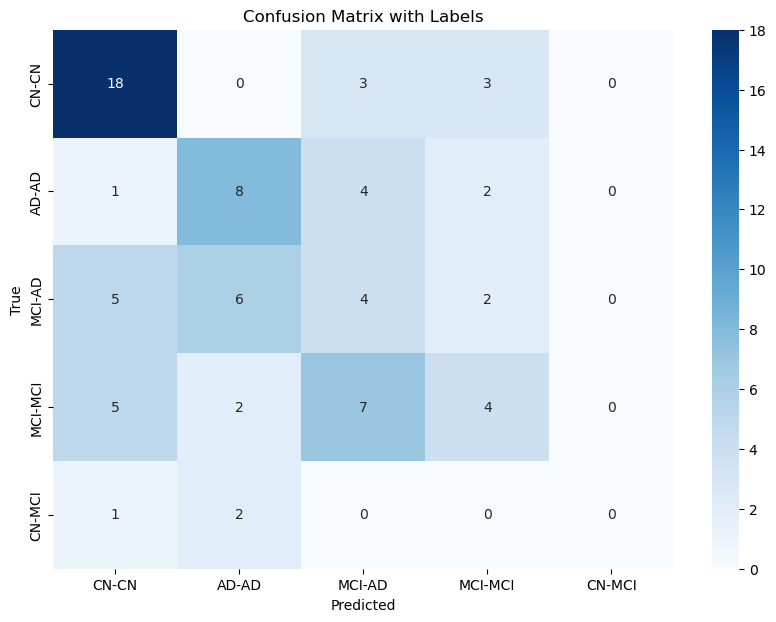

In [152]:


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=34, stratify=y)

rf_model_smote = RandomForestClassifier(n_estimators=100, max_features='sqrt', random_state=34)

print("Y Train Values:")
print(y_train.value_counts())


smote = SMOTE(sampling_strategy="auto", random_state=34)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("Y Train Values:")
print(y_train_smote.value_counts())


rf_model_smote.fit(X_train_smote, y_train_smote)
rf_pred = rf_model_smote.predict(X_test)
print(classification_report(y_test, rf_pred,zero_division=0))
cm = confusion_matrix(y_test, rf_pred)
plot_confusion_matrix_with_labels(cm,label_mapping)


In [153]:
rf_score_smote = cross_val_score(rf_model_smote, X, y, cv=5,scoring='f1_macro')

print(f"Cross Validation Score: {rf_score_smote}")
print(f"Cross Validation Score Média: {rf_score_smote.mean()}")
print(f"Cross Validation Score STD: {rf_score_smote.std()}")

Cross Validation Score: [0.39368608 0.29021174 0.32406015 0.44953098 0.35297907]
Cross Validation Score Média: 0.3620936043359335
Cross Validation Score STD: 0.055389531418651265


Como esperado, a introdução não trouxe beneficios ao nosso modelo, pois a criação de dados sinteticos a partir de dados biologicos é muito complexa e normalmente cria ruido.

Isto é notorio por uma diminuição das classes minoritarias, como AD-AD, MCI-MCI e MCI-AD


Número de features por intervalo de importância:
Entre 0.012 e inf: 1
Entre 0.010 e 0.012: 3
Entre 0.008 e 0.010: 7
Entre 0.006 e 0.008: 6
Entre 0.004 e 0.006: 45
Entre 0.002 e 0.004: 174
Entre 0.000 e 0.002: 108


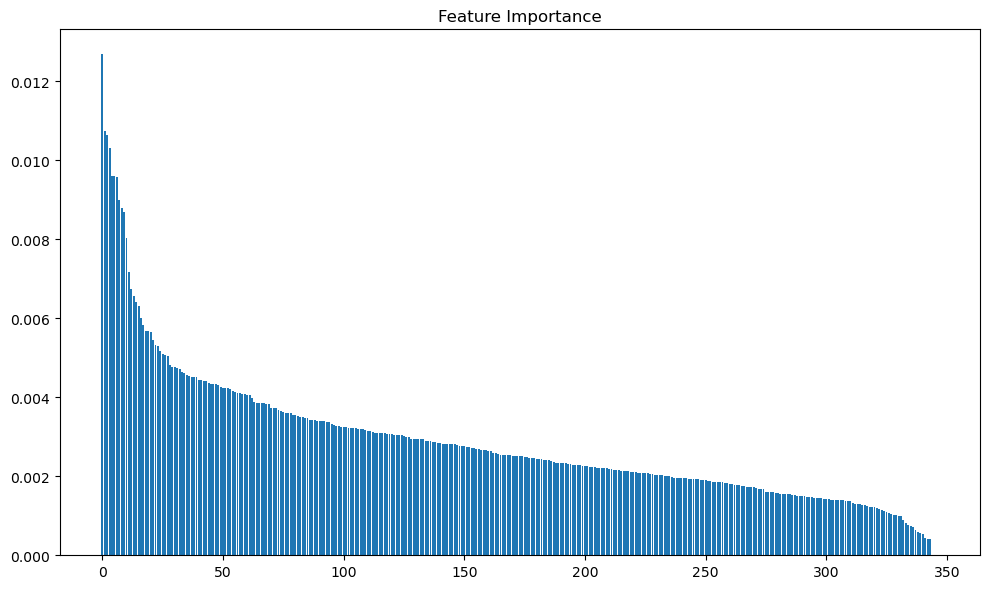

In [154]:
import numpy as np
import matplotlib.pyplot as plt

def feature_importance(model, X_train):

    # Obter as importâncias das features
    importances = model.feature_importances_

    # Exibir os intervalos de importância
    thresholds = [(0.012, float('inf')), (0.010, 0.012), (0.008, 0.010), 
                  (0.006, 0.008), (0.004, 0.006), (0.002, 0.004), (0, 0.002)]
    
    print("\nNúmero de features por intervalo de importância:")
    for low, high in thresholds:
        count = np.sum((importances > low) & (importances <= high))
        print(f"Entre {low:.3f} e {high:.3f}: {count}")

    # Ordenar as importâncias em ordem decrescente
    indices = np.argsort(importances)[::-1]

    # Criar o gráfico
    plt.figure(figsize=(10, 6))
    plt.title("Feature Importance")
    
    # Adicionar barras
    plt.bar(range(X_train.shape[1]), importances[indices])

    # Exibir o gráfico
    plt.tight_layout()
    plt.show()



feature_importance(rf_model_score,X_train)


--- Avaliando com threshold: 0.012 ---
              precision    recall  f1-score   support

           0       0.25      0.29      0.27        24
           1       0.32      0.47      0.38        15
           2       0.08      0.06      0.07        17
           3       0.27      0.17      0.21        18
           4       0.00      0.00      0.00         3

    accuracy                           0.23        77
   macro avg       0.18      0.20      0.18        77
weighted avg       0.22      0.23      0.22        77



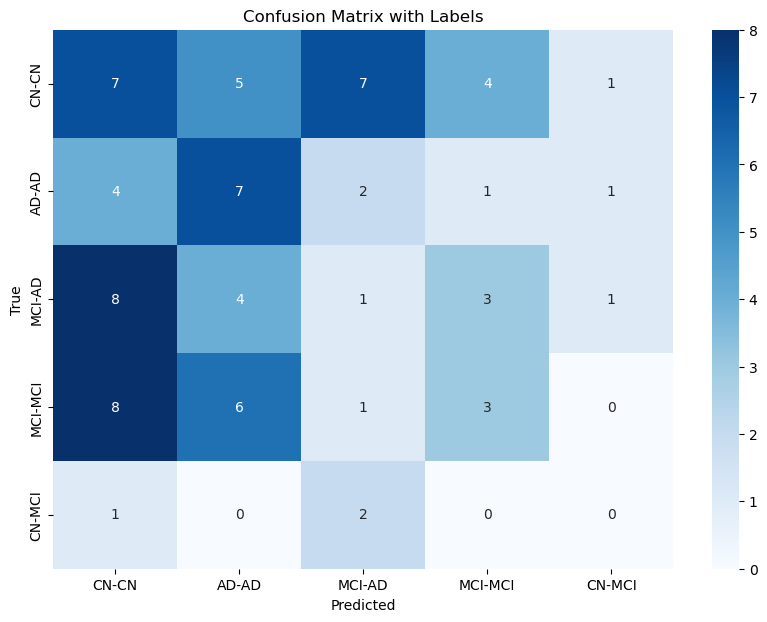

Cross Validation Score: [0.23896786 0.28141026 0.33086835 0.3195977  0.39403922]
Cross Validation Score Média: 0.31297667612107666
Cross Validation Score STD: 0.051785768133963475

--- Avaliando com threshold: 0.01 ---
              precision    recall  f1-score   support

           0       0.45      0.54      0.49        24
           1       0.62      0.67      0.65        15
           2       0.28      0.29      0.29        17
           3       0.36      0.28      0.31        18
           4       0.00      0.00      0.00         3

    accuracy                           0.43        77
   macro avg       0.34      0.36      0.35        77
weighted avg       0.41      0.43      0.41        77



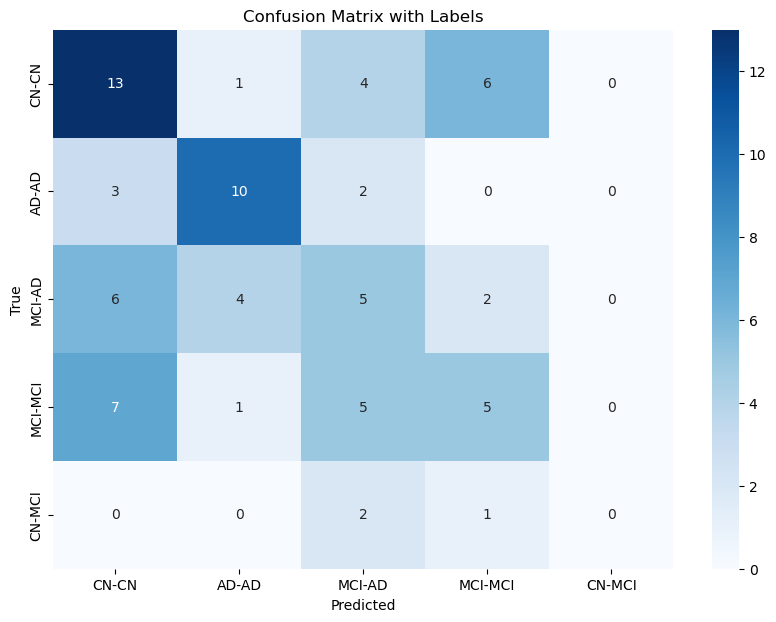

Cross Validation Score: [0.23896786 0.28141026 0.33086835 0.3195977  0.39403922]
Cross Validation Score Média: 0.31297667612107666
Cross Validation Score STD: 0.051785768133963475

--- Avaliando com threshold: 0.008 ---
              precision    recall  f1-score   support

           0       0.64      0.58      0.61        24
           1       0.50      0.47      0.48        15
           2       0.20      0.24      0.22        17
           3       0.19      0.22      0.21        18
           4       0.00      0.00      0.00         3

    accuracy                           0.38        77
   macro avg       0.31      0.30      0.30        77
weighted avg       0.38      0.38      0.38        77



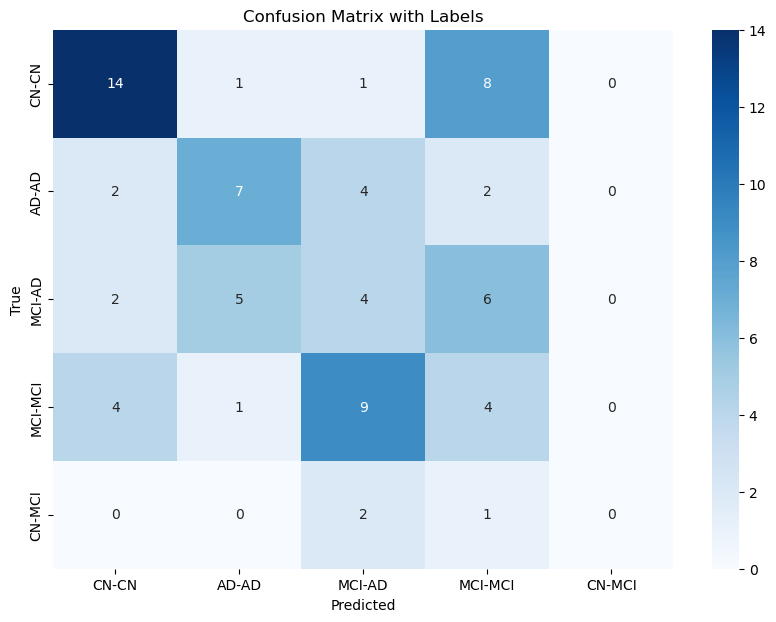

Cross Validation Score: [0.23896786 0.28141026 0.33086835 0.3195977  0.39403922]
Cross Validation Score Média: 0.31297667612107666
Cross Validation Score STD: 0.051785768133963475

--- Avaliando com threshold: 0.006 ---
              precision    recall  f1-score   support

           0       0.62      0.62      0.62        24
           1       0.64      0.60      0.62        15
           2       0.23      0.35      0.28        17
           3       0.08      0.06      0.06        18
           4       0.00      0.00      0.00         3

    accuracy                           0.40        77
   macro avg       0.32      0.33      0.32        77
weighted avg       0.39      0.40      0.39        77



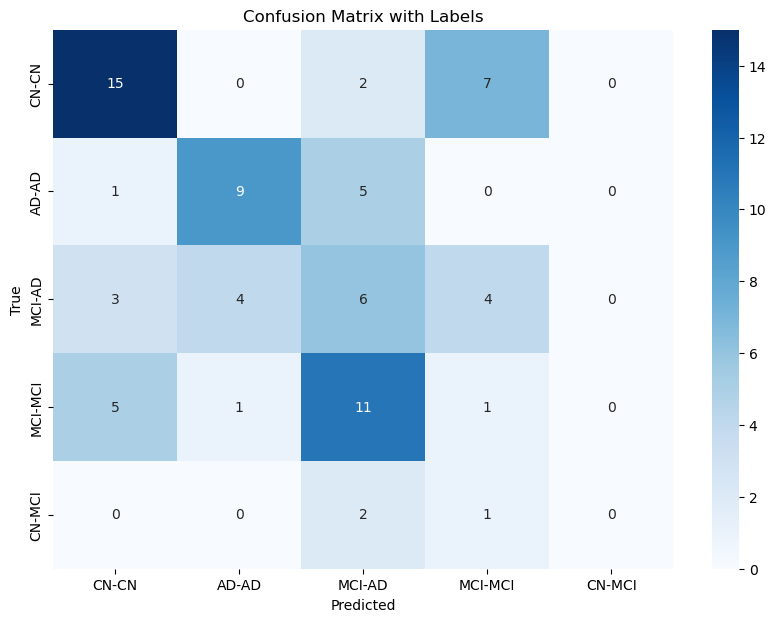

Cross Validation Score: [0.23896786 0.28141026 0.33086835 0.3195977  0.39403922]
Cross Validation Score Média: 0.31297667612107666
Cross Validation Score STD: 0.051785768133963475

--- Avaliando com threshold: 0.002 ---
              precision    recall  f1-score   support

           0       0.56      0.83      0.67        24
           1       0.62      0.53      0.57        15
           2       0.30      0.35      0.32        17
           3       0.25      0.11      0.15        18
           4       0.00      0.00      0.00         3

    accuracy                           0.47        77
   macro avg       0.34      0.37      0.34        77
weighted avg       0.42      0.47      0.43        77



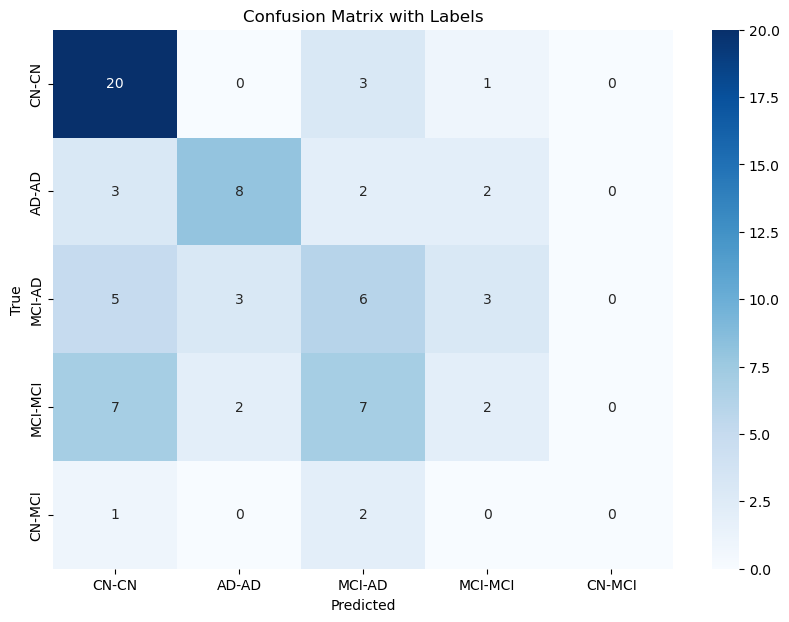

Cross Validation Score: [0.23896786 0.28141026 0.33086835 0.3195977  0.39403922]
Cross Validation Score Média: 0.31297667612107666
Cross Validation Score STD: 0.051785768133963475


In [157]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
import numpy as np


def evaluate_model_with_thresholds(model, X_train, X_test, y_train, y_test, thresholds, label_mapping,X,y):
    """
    Avalia o modelo RandomForestClassifier alterando o threshold para seleção de features.

    Parâmetros:
        model: O modelo RandomForestClassifier a ser utilizado.
        X_train: Conjunto de treinamento.
        X_test: Conjunto de teste.
        y_train: Labels do conjunto de treinamento.
        y_test: Labels do conjunto de teste.
        thresholds: Lista de thresholds para seleção de features.
        label_mapping: Mapeamento de rótulos para a matriz de confusão.
    """
    for threshold in thresholds:
        print(f"\n--- Avaliando com threshold: {threshold} ---")

        # Criar objeto SelectFromModel com o threshold atual
        sfm = SelectFromModel(model, threshold=threshold)

        # Selecionar as features mais importantes
        X_important_train = sfm.fit_transform(X_train, y_train)
        X_important_test = sfm.transform(X_test)

        # Treinar o modelo com as features selecionadas
        model.fit(X_important_train, y_train)
        
        # Fazer previsões
        y_pred = model.predict(X_important_test)

        # Imprimir relatório de classificação
        print(classification_report(y_test, y_pred, zero_division=0))

        # Calcular e plotar matriz de confusão
        cm = confusion_matrix(y_test, y_pred)
        plot_confusion_matrix_with_labels(cm, label_mapping)

        # Cross-validation no conjunto original
        rf_score_norm = cross_val_score(model, X_train, y_train, cv=5, scoring='f1_macro')

        # Exibir resultados de validação cruzada
        print(f"Cross Validation Score: {rf_score_norm}")
        print(f"Cross Validation Score Média: {rf_score_norm.mean()}")
        print(f"Cross Validation Score STD: {rf_score_norm.std()}")

# Exemplo de uso
rf_model_score = RandomForestClassifier(n_estimators=100, max_features='sqrt', random_state=34)
thresholds = [0.012, 0.010, 0.008, 0.006, 0.002]

# Substitua pelas suas variáveis reais de X_train, X_test, y_train, y_test e label_mapping
evaluate_model_with_thresholds(rf_model_score, X_train, X_test, y_train, y_test, thresholds, label_mapping,X,y)


Analisando os resultados obtidos, percebemos que obtemos os melhores resultados quando não retiramos as colunas com menos importancia.
É percetivel tambem que as classes mais dificies de prever como MCI-MCI ou MCI-AD são as mais afetadas pela retirada das feature com menos importancia, portanto, vamos manter todas as features ao passarmos para o hypertunninh 